In [1]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from datetime import datetime
import math
from sklearn.metrics import r2_score

In [3]:
df_data = pd.concat([pd.read_csv('dbmetrics_20221016_1.csv'), pd.read_csv('dbmetrics_20221016_2.csv')], ignore_index=True)

In [4]:
df_data.columns = ['TIME', 'TPS1', 'TPS2', 'TPS3', 'USER1', 'USER2', 'USER3', 'CALL1', 'CALL2', 'CALL3', 'SQL1', 'SQL2', 'SQL3']

In [5]:
df_data.head()

,TIME,TPS1,TPS2,TPS3,USER1,USER2,USER3,CALL1,CALL2,CALL3,SQL1,SQL2,SQL3
0,8/1/2022 00:00,0.26,0.26,0.20,5.96,10.73,7.84,16,16,12,54,172,47
1,8/1/2022 00:01,0.23,0.15,0.16,1.95,2.88,3.11,14,9,10,71,47,66
2,8/1/2022 00:02,0.13,0.10,0.16,2.70,7.22,2.28,8,6,10,18,23,23
3,8/1/2022 00:03,0.25,0.21,0.18,4.09,5.30,5.05,15,13,11,66,40,64
4,8/1/2022 00:04,0.06,0.15,0.10,1.58,5.36,1.84,4,9,6,27,60,16


In [6]:
df_data.describe()

,TPS1,TPS2,TPS3,USER1,USER2,USER3,CALL1,CALL2,CALL3,SQL1,SQL2,SQL3
count,87838.000000,87838.000000,87838.000000,87838.000000,87838.000000,87838.000000,87838.000000,87838.000000,87838.000000,87838.000000,87838.000000,87838.000000
mean,2.047824,2.044965,1.946026,64.790628,64.866435,63.740589,123.125720,122.955008,117.019172,1228.248252,1225.173353,1160.161547
std,2.904537,2.885623,2.720995,69.724799,69.793496,68.578989,174.288429,173.152698,163.275384,1993.976658,1980.119035,1863.578485
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.200000,0.200000,9.610000,9.770000,9.610000,12.000000,12.000000,12.000000,64.000000,65.000000,64.000000
50%,0.640000,0.640000,0.630000,38.770000,38.675000,38.160000,39.000000,39.000000,38.000000,251.000000,251.000000,246.000000
75%,2.980000,2.980000,2.840000,104.000000,104.000000,102.000000,179.000000,179.000000,171.000000,1473.750000,1487.000000,1419.000000
max,22.850000,23.580000,21.660000,497.000000,493.000000,479.000000,1371.000000,1415.000000,1300.000000,16379.000000,17026.000000,15903.000000


In [7]:
df_data['T'] = pd.to_datetime(df_data['TIME'], format='%m/%d/%Y %H:%M', errors='raise')
df_data['T'] = df_data['T'].apply(lambda x: int(datetime.strftime(x, '%H%M')))

In [8]:
df_data

,TIME,TPS1,TPS2,TPS3,USER1,USER2,USER3,CALL1,CALL2,CALL3,SQL1,SQL2,SQL3,T
0,8/1/2022 00:00,0.26,0.26,0.20,5.96,10.73,7.84,16,16,12,54,172,47,0
1,8/1/2022 00:01,0.23,0.15,0.16,1.95,2.88,3.11,14,9,10,71,47,66,1
2,8/1/2022 00:02,0.13,0.10,0.16,2.70,7.22,2.28,8,6,10,18,23,23,2
3,8/1/2022 00:03,0.25,0.21,0.18,4.09,5.30,5.05,15,13,11,66,40,64,3
4,8/1/2022 00:04,0.06,0.15,0.10,1.58,5.36,1.84,4,9,6,27,60,16,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87833,9/30/2022 23:54,0.53,0.43,0.44,24.64,48.78,46.59,32,26,27,243,172,168,2354
87834,9/30/2022 23:55,0.44,0.46,0.51,39.07,43.18,46.74,27,28,31,186,169,253,2355
87835,9/30/2022 23:56,0.50,0.44,0.53,40.73,52.67,45.27,30,27,32,119,196,182,2356
87836,9/30/2022 23:57,0.50,0.63,0.48,43.14,49.33,51.34,30,38,29,199,220,170,2357


In [9]:
df_data['USER'] = df_data['USER1'] + df_data['USER2'] + df_data['USER3']

In [10]:
df_data['CALL'] = df_data['CALL1'] + df_data['CALL2'] + df_data['CALL3']

In [11]:
df_data['SQL'] = df_data['SQL1'] + df_data['SQL2'] + df_data['SQL3']

In [12]:
df_data['TPS'] = df_data['TPS1'] + df_data['TPS2'] + df_data['TPS3']

In [13]:
df_data = df_data[['T', 'USER', 'CALL', 'SQL', 'TPS']]

In [14]:
df_data.head()

,T,USER,CALL,SQL,TPS
0,0,24.53,44,273,0.72
1,1,7.94,33,184,0.54
2,2,12.20,24,64,0.39
3,3,14.44,39,170,0.64
4,4,8.78,19,103,0.31


In [15]:
def correct_was_count(rows):
    uc = math.ceil(rows['USER'] / 200)
    cc = math.ceil(rows['CALL'] / 1000)
    sc = math.ceil(rows['SQL'] / 10000)
    tc = math.ceil(rows['TPS'] / 20)    
    return max(uc, cc, sc, tc) + 1

In [16]:
df_data['WAS'] = df_data.apply(lambda x: correct_was_count(x) ,axis=1)

C:\Users\hyunw\AppData\Local\Temp\ipykernel_54216\1643828411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['WAS'] = df_data.apply(lambda x: correct_was_count(x) ,axis=1)


In [17]:
df_data.sort_values('WAS', ascending=False)

,T,USER,CALL,SQL,TPS,WAS
46695,1016,1413.0,3437,41847,57.27,9
46697,1018,1405.0,3952,47782,65.85,9
46688,1009,1288.0,2366,29064,39.41,8
46716,1037,1282.0,2985,35873,49.74,8
23929,1449,1221.0,3206,35662,53.43,8
...,...,...,...,...,...,...
57795,316,0.0,0,0,0.00,1
46600,841,0.0,0,0,0.00,1
46601,842,0.0,0,0,0.00,1
46602,843,0.0,0,0,0.00,1


<AxesSubplot:ylabel='Frequency'>

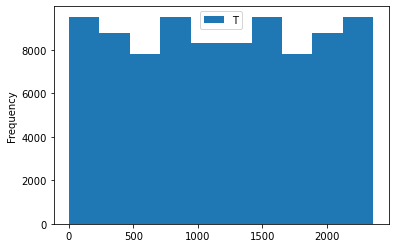

In [18]:
df_data.plot(kind='hist',  y='T' )

<AxesSubplot:ylabel='Frequency'>

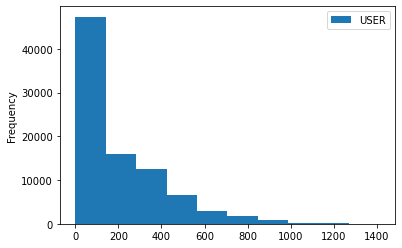

In [19]:
df_data.plot(kind='hist',  y='USER' )

<AxesSubplot:ylabel='Frequency'>

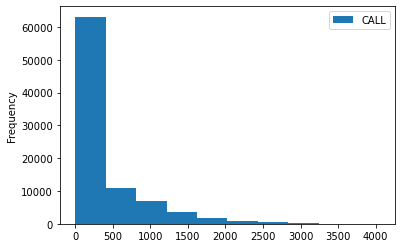

In [20]:
df_data.plot(kind='hist',  y='CALL' )

<AxesSubplot:ylabel='Frequency'>

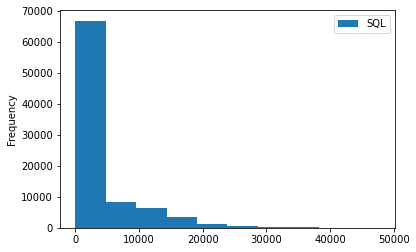

In [21]:
df_data.plot(kind='hist',  y='SQL' )

<AxesSubplot:ylabel='Frequency'>

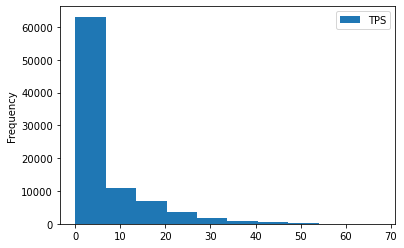

In [22]:
df_data.plot(kind='hist',  y='TPS' )

<Figure size 792x792 with 0 Axes>

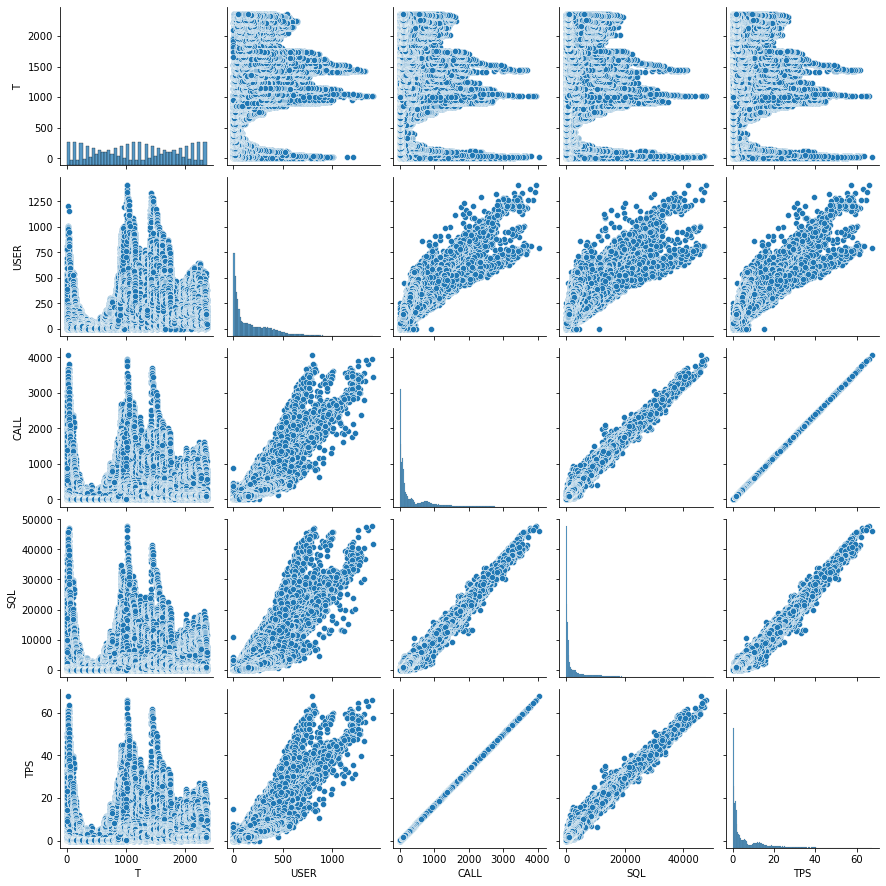

In [23]:
# Pairplot
plt.figure(figsize=(11,11))
sns.pairplot(df_data.drop(columns = ['WAS']))

In [24]:
# Use the statsmodels package
import statsmodels.api as sm

X = sm.add_constant(df_data)
lin_model = sm.OLS(df_data['WAS'], X)
my_model = lin_model.fit()
print(my_model.summary())
print(my_model.params)

                            OLS Regression Results                            
Dep. Variable:                    WAS   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.243e+30
Date:                Wed, 19 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:47:44   Log-Likelihood:             2.5279e+06
No. Observations:               87838   AIC:                        -5.056e+06
Df Residuals:                   87831   BIC:                        -5.056e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.22e-15   2.08e-15      1.067      0.2

In [25]:
corr = df_data.drop(columns = ['WAS']).corr()
corr

,T,USER,CALL,SQL,TPS
T,1.000000,0.240034,0.125023,0.083905,0.124945
USER,0.240034,1.000000,0.900317,0.848212,0.900282
CALL,0.125023,0.900317,1.000000,0.984311,1.000000
SQL,0.083905,0.848212,0.984311,1.000000,0.984319
TPS,0.124945,0.900282,1.000000,0.984319,1.000000


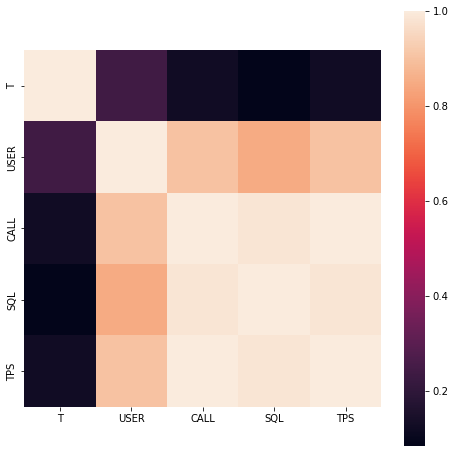

In [26]:
plt.figure(figsize = (8,8))
sns.heatmap(corr, square = True);

In [27]:
data_X = df_data.loc[:, ['T', 'USER', 'SQL', 'CALL', 'TPS']]
data_y = df_data['WAS']

In [28]:
data_y

0        2
1        2
2        2
3        2
4        2
        ..
87833    2
87834    2
87835    2
87836    2
87837    2
Name: WAS, Length: 87838, dtype: int64

In [29]:
sk_lin_model = LinearRegression()
my_model = sk_lin_model.fit(data_X, data_y)

In [30]:
r2_score = my_model.score(data_X, data_y)

In [31]:
print('R2 score is ', r2_score)
print('intercept (b0) ', my_model.intercept_)
coef_names = ['b1','b2', 'b3', 'b4', 'b5']
print(pd.DataFrame({'Predictor': data_X.columns,
                    'coefficient Name':coef_names, 
                    'coefficient Value': my_model.coef_}))

R2 score is  0.9290924168398695
intercept (b0)  1.8968081269596766
  Predictor coefficient Name  coefficient Value
0         T               b1          -0.000074
1      USER               b2           0.004067
2       SQL               b3           0.000003
3      CALL               b4          -0.075157
4       TPS               b5           4.518626


In [32]:
import numpy as np
np.random.seed(24)
train = np.random.choice(df_data.shape[0], int(0.8 * df_data.shape[0]), replace=False)
validation = [i for i in range(df_data.shape[0]) if i not in train]

In [33]:
X_train = df_data.iloc[train, :][['SQL', 'TPS']]
y_train = np.reshape(np.array(df_data.iloc[train]['WAS']), (-1,1))

In [34]:
X_train

,SQL,TPS
46358,1293,1.82
59921,68,0.34
51187,3327,3.99
30361,5321,7.75
16266,94,0.44
...,...,...
69710,238,0.79
12014,482,1.00
53784,335,0.61
4311,181,0.69


In [35]:
y_train

array([[2],
       [2],
       [3],
       ...,
       [2],
       [2],
       [2]], dtype=int64)

In [36]:
lin_model = LinearRegression()
my_model = lin_model.fit(X_train, y_train)

In [37]:
print('intercept (b0) ', my_model.intercept_)
coef_names = ['b1','b2']
print(pd.DataFrame({'Predictor': X_train.columns,
                    'coefficient Name':coef_names, 
                    'coefficient Value': my_model.coef_[0]}))

intercept (b0)  [1.9317746]
  Predictor coefficient Name  coefficient Value
0       SQL               b1          -0.000160
1       TPS               b2           0.207725


In [38]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(y_train, my_model.predict(X_train), squared =False)
print('R2 score is ', my_model.score(X_train, y_train))
print('the root mean square error is ', RMSE)

R2 score is  0.8229634885047453
the root mean square error is  0.40152133367451814


In [39]:
oos = validation
X_val = df_data.iloc[oos, :][['SQL', 'TPS']]
y_val = df_data.loc[oos, 'WAS']
val_pred = my_model.predict(X_val)
val_RMSE = mean_squared_error(val_pred, y_val, squared = False)
print('the validation RMSE is ', val_RMSE)

the validation RMSE is  0.3959626060142879


In [40]:
r2_score = my_model.score(X_val, y_val)
print('R2 score is ', r2_score)

R2 score is  0.8201365495808809


In [41]:
df_data[['SQL', 'TPS']].describe().T

,count,mean,std,min,25%,50%,75%,max
SQL,87838.0,3613.583153,5825.989438,0.0,201.00,740.00,4359.75,47782.00
TPS,87838.0,6.038815,8.499763,0.0,0.58,1.92,8.83,67.55


In [42]:
X = df_data[['SQL', 'TPS']]
y = df_data['WAS']

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, \
                                                    test_size=0.3, random_state=42, shuffle=True)

In [44]:
X_train

,SQL,TPS
84130,4116,7.01
31502,9721,14.47
30502,1118,1.99
48084,138,0.44
27779,2072,3.01
...,...,...
6265,387,0.98
54886,14,0.14
76820,372,0.94
860,4329,13.05


In [45]:
y_train

84130    3
31502    3
30502    2
48084    2
27779    2
        ..
6265     2
54886    2
76820    2
860      3
15795    2
Name: WAS, Length: 61486, dtype: int64

In [46]:
lin_model = LinearRegression()
my_model = lin_model.fit(X_train, y_train)
print('R2 score is ', my_model.score(X_valid, y_valid))
print('model coefficients:\n', my_model.coef_, '\nintercept: ',my_model.intercept_)

R2 score is  0.8218833453667719
model coefficients:
 [-1.60483697e-04  2.07848264e-01] 
intercept:  1.9313606340989786


In [47]:
RMSE = mean_squared_error(y_train, my_model.predict(X_train), squared =False)
print('the root mean square error is ', RMSE)

the root mean square error is  0.3989526843688306


In [48]:
adjust_X_train = sm.add_constant(X_train)
adjust_my_model = sm.OLS(y_train, adjust_X_train).fit()
print('rsquared_adj : ', adjust_my_model.rsquared_adj)

rsquared_adj :  0.8226489230821665


<Figure size 792x792 with 0 Axes>

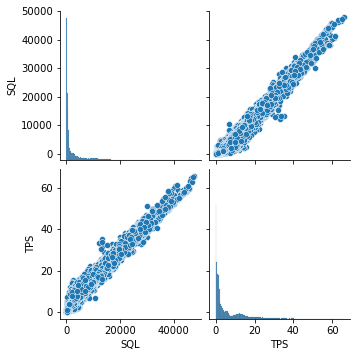

In [49]:
# Pairplot
plt.figure(figsize=(11,11))
sns.pairplot(X_train)

In [50]:
#Y_max = Y.max()
#Y_min = Y.min()

ax = sns.scatterplot(x=my_model.fittedvalues, y=Y)
# ax.set(ylim=(Y_min, Y_max))
# ax.set(xlim=(Y_min, Y_max))
ax.set_xlabel("Predicted value of Strength")
ax.set_ylabel("Observed value of Strength")

X_ref = Y_ref = np.linspace(Y_min, Y_max, 100)
plt.plot(X_ref, Y_ref, color='red', linewidth=1)
plt.show()

AttributeError: 'LinearRegression' object has no attribute 'fittedvalues'

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=['SQL', 'TPS'])
X_valid_sacled = pd.DataFrame(scaler.transform(X_valid), columns=['SQL', 'TPS'])

In [ ]:
print('스케일링 전')
X_train.describe().T

In [ ]:
X_train.plot(x="TPS", y=["SQL"])

In [ ]:
print('스케일링 후')
X_train_scaled.describe().T

In [ ]:
X_train_scaled.plot(x="TPS", y=["SQL"])

In [ ]:
lin_model_sacled = LinearRegression()
my_model_sacled = lin_model_sacled.fit(X_train_scaled, y_train)
print('R2 score is ', my_model_sacled.score(X_valid_sacled, y_valid))
print('model coefficients:\n', my_model_sacled.coef_, '\nintercept: ',my_model_sacled.intercept_)

In [ ]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(y_train, my_model_sacled.predict(X_train_scaled), squared =False)
print('the root mean square error is ', RMSE)

In [ ]:
my_model.predict([[44896, 50.14]])